## TASK 03

#### PROBLEM STATEMENT : Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data by using a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

#### DATASET USED: Bank Marketing dataset from UCI Machine learning Repository

In [7]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
from scipy.stats import chi2_contingency

In [9]:
#loading the train dataset 
data = pd.read_csv("bank.csv")

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Exploratory Data Analysis

In [6]:
#printing the shape
print("The shape of the data is",data.shape)

The shape of the data is (11162, 17)


In [42]:
# Checking the type of data and the missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
data.dtypes.value_counts()

object    10
int64      7
dtype: int64

In [8]:
#checking for missing values
data.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
# Descriptive Statistical Analysis:
data.describe( include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


<Axes: xlabel='marital', ylabel='count'>

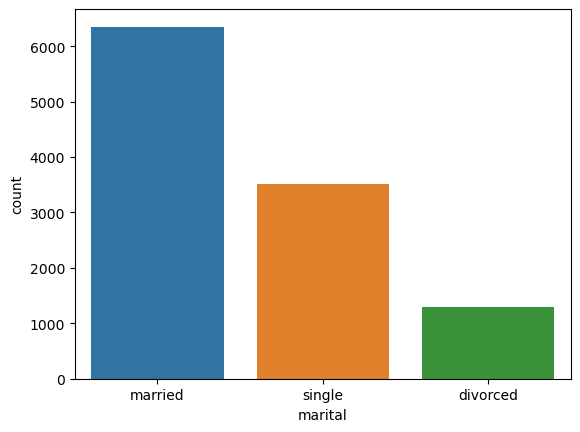

In [13]:
# Plotting the 'marital' frequency
sns.countplot(data,x='marital')


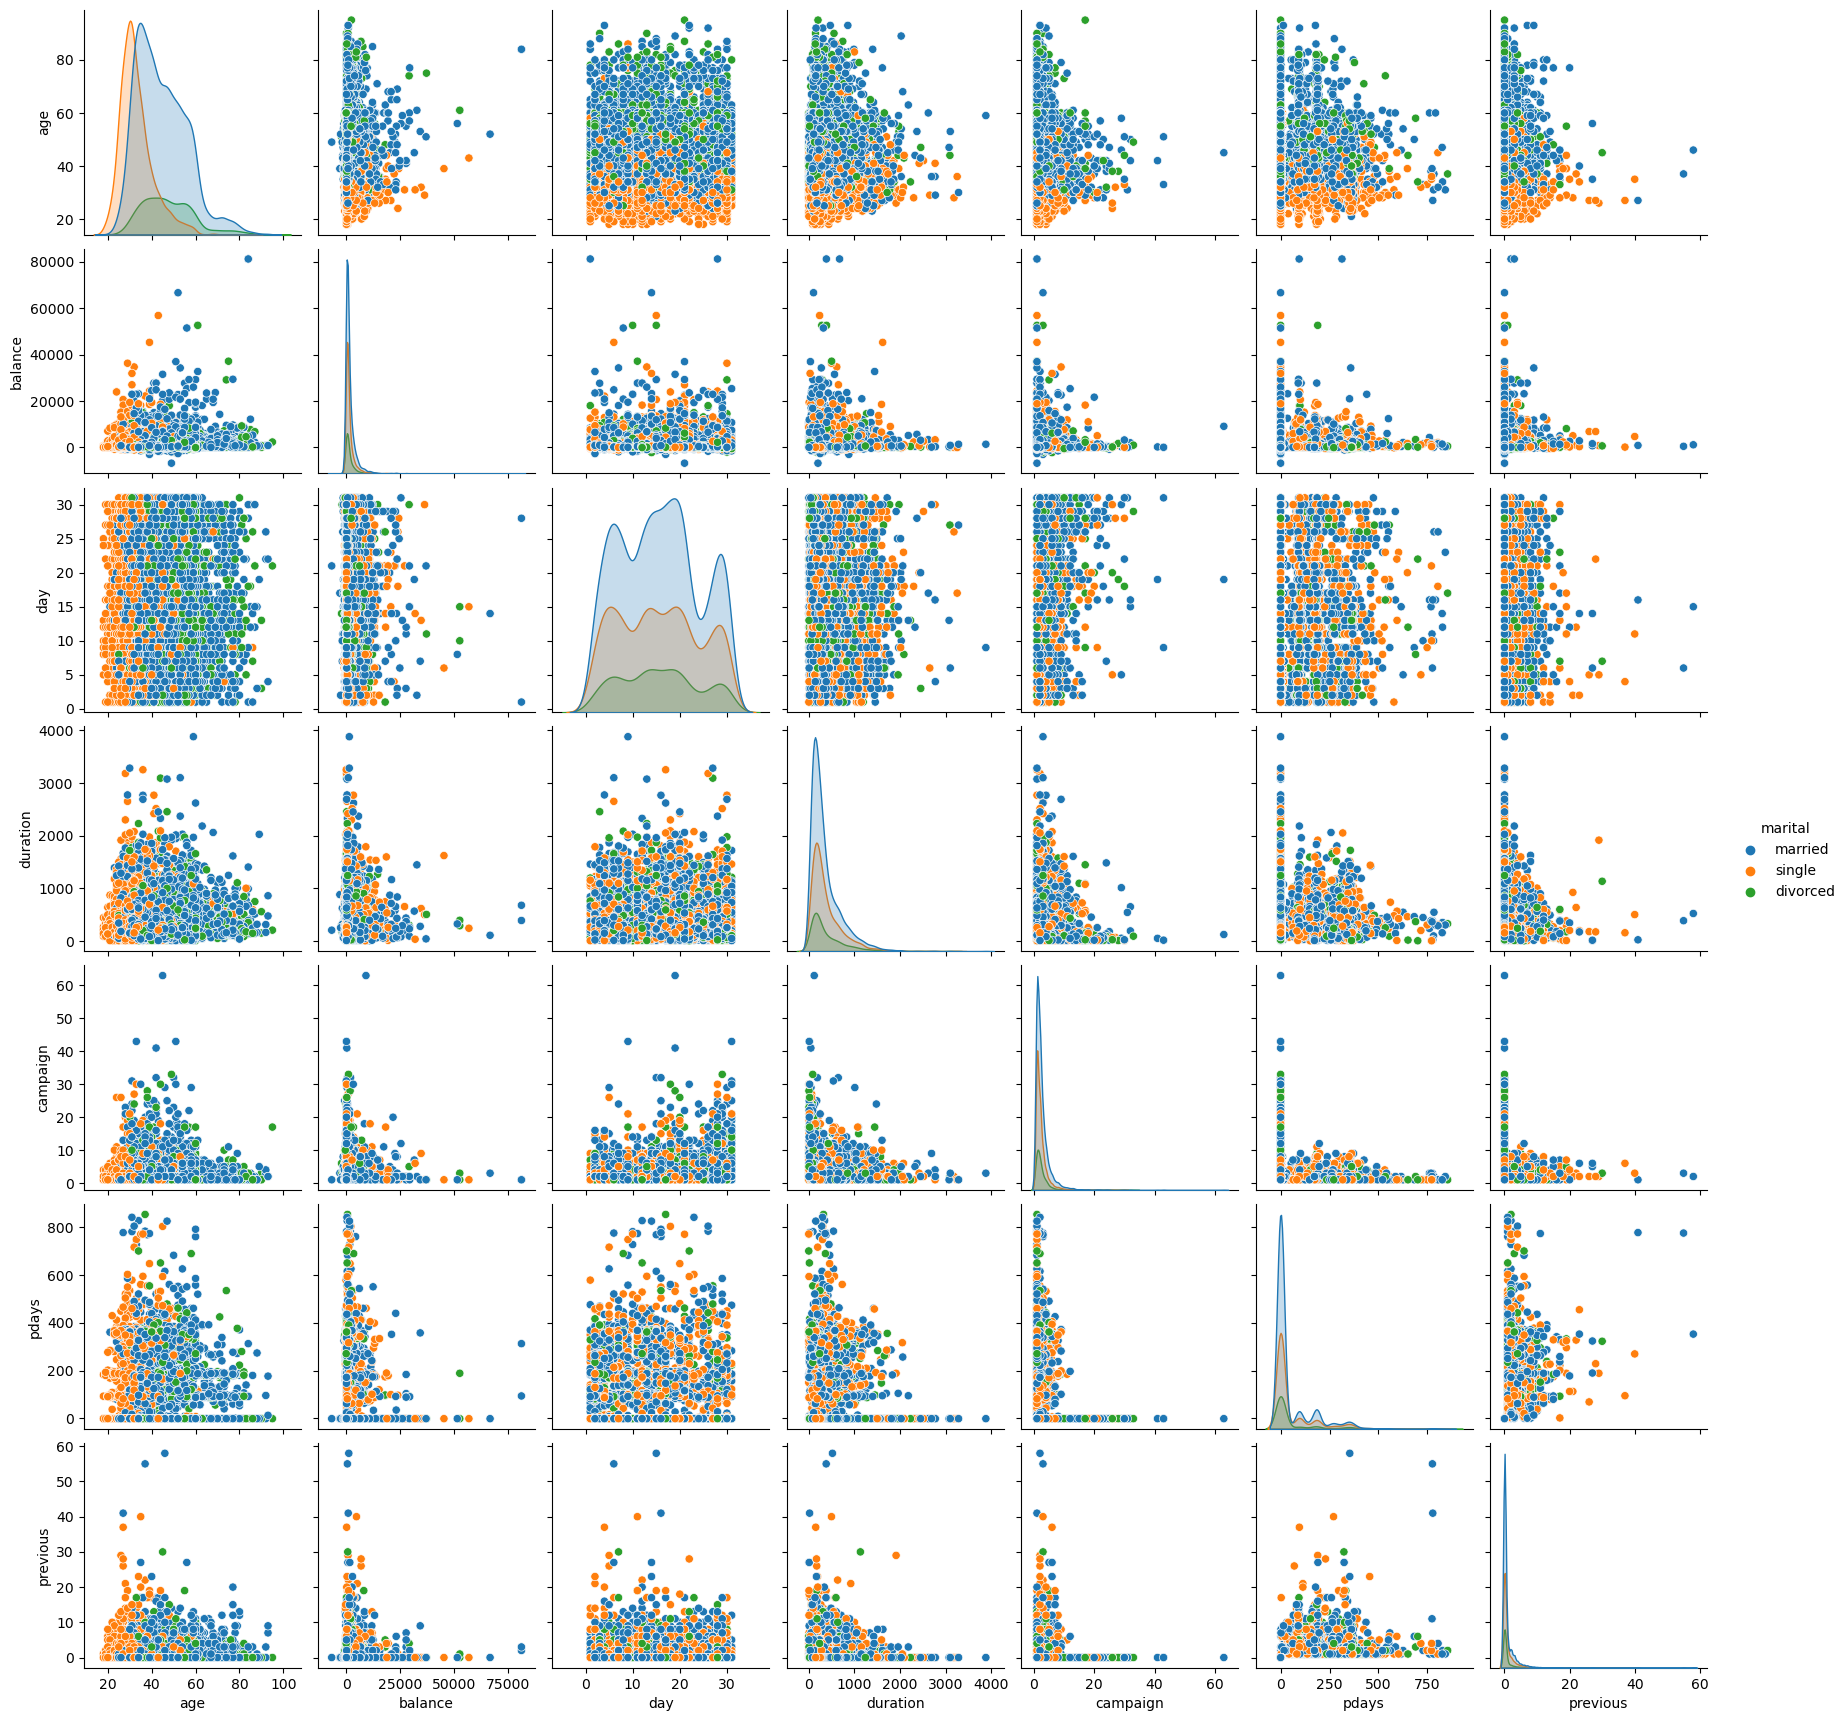

In [14]:
sns.pairplot(data,hue='marital')

In [15]:
#Selecting the non-numerical columns:
print("The non-numerical columns are: ")
data_non_numerical=data.select_dtypes(object)
data_non_numerical

The non-numerical columns are: 


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


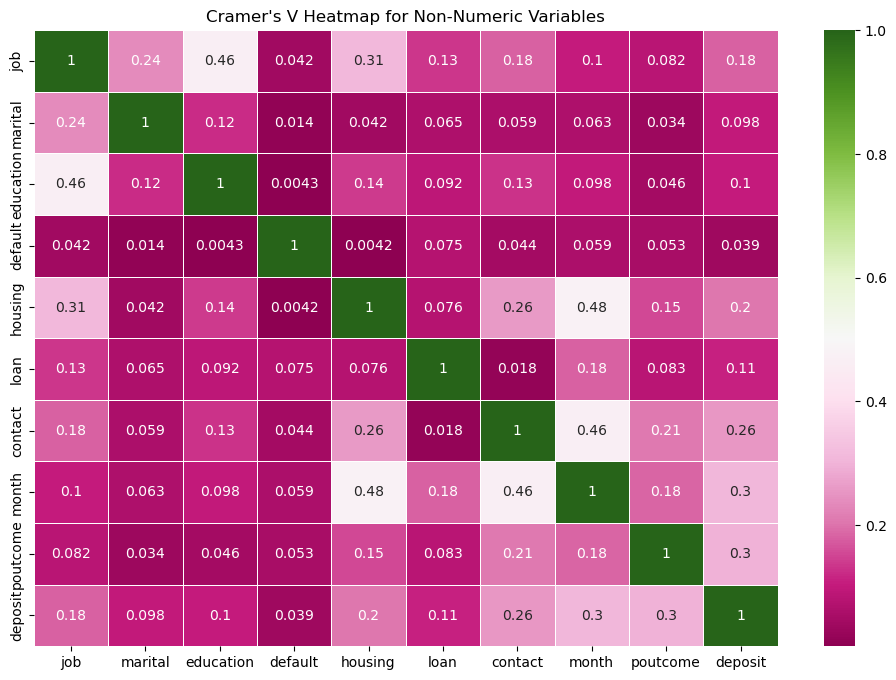

In [19]:
# Create a function to calculate Cramer's V statistic
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create a matrix of Cramer's V values between variables
columns = data_non_numerical.columns
cramer_matrix = pd.DataFrame(index=columns, columns=columns)
for col1 in columns:
    for col2 in columns:
        cramer_matrix.loc[col1, col2] = cramers_v(data_non_numerical[col1], data_non_numerical[col2])

# Create a heatmap from the Cramer's V matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cramer_matrix.astype(float), annot=True, cmap="PiYG" ,linewidth=.5)

plt.title("Cramer's V Heatmap for Non-Numeric Variables")
plt.show()


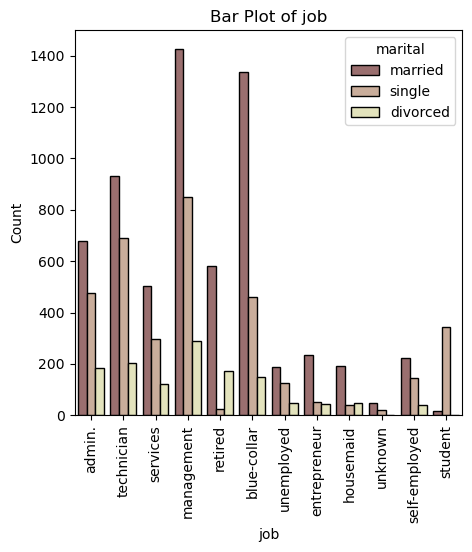

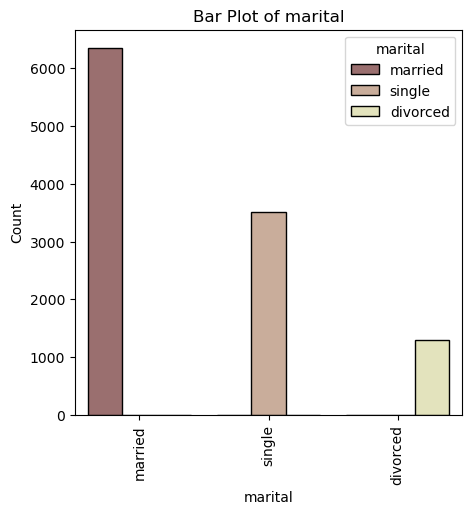

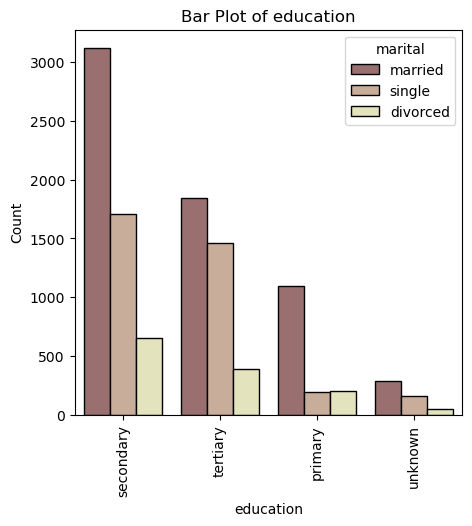

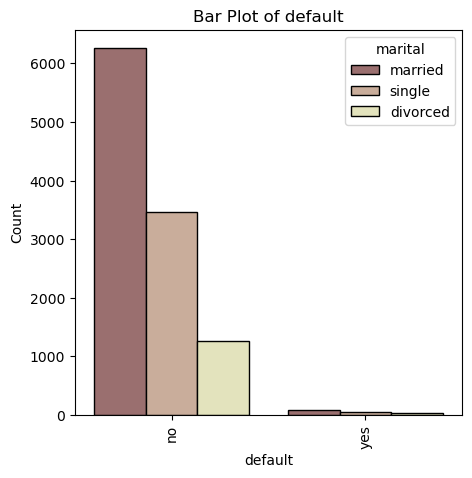

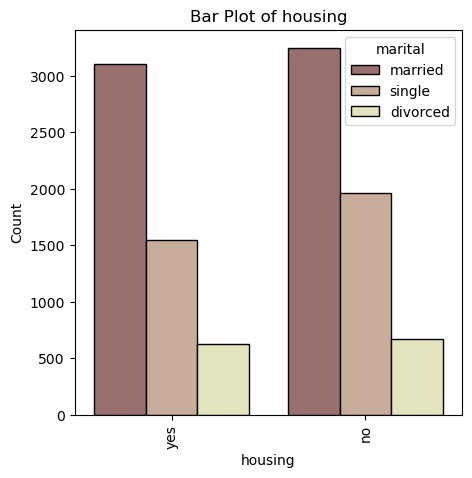

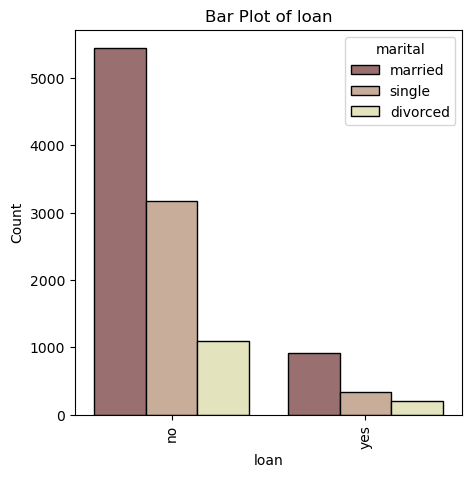

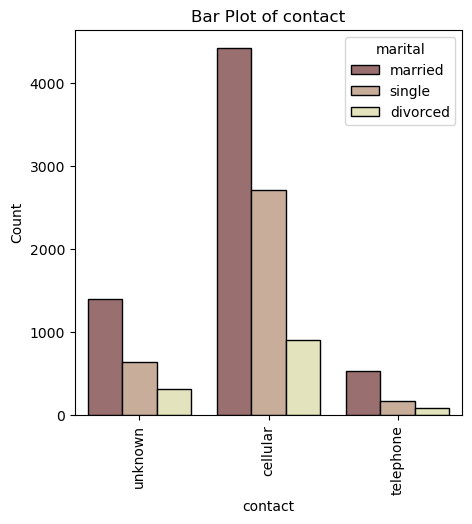

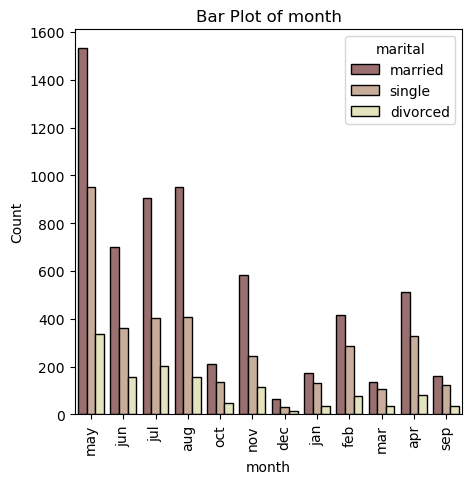

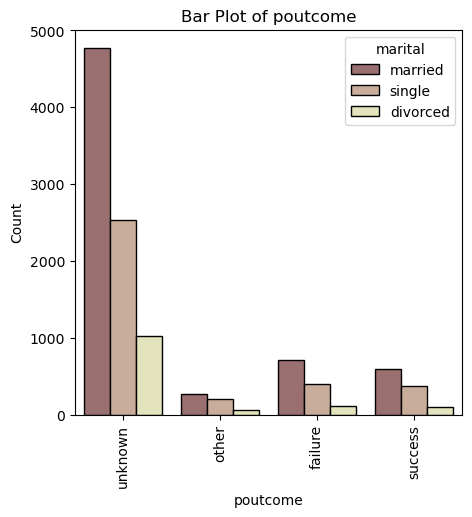

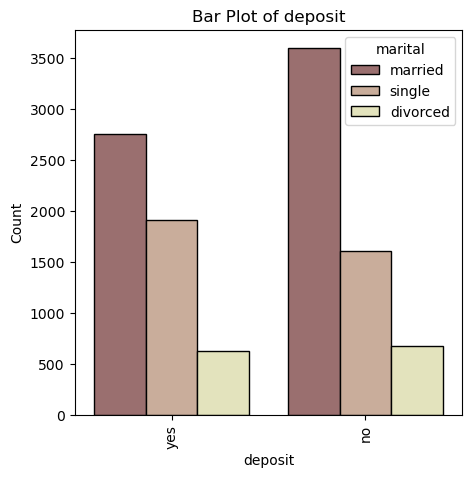

In [21]:
# using barplot
for feature in data_non_numerical:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=feature, data=data_non_numerical, palette='pink', hue="marital", edgecolor = "black") 
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [24]:
#Selecting the numerical columns:
print("The Numerical columns are: ")
data_numerical=data.select_dtypes(np.number)
data_numerical

The Numerical columns are: 


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [25]:
#  Correlation matrix (for continuous variables)
correlation_matrix = data_numerical.corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


### Visualizing the correlation with heatmap

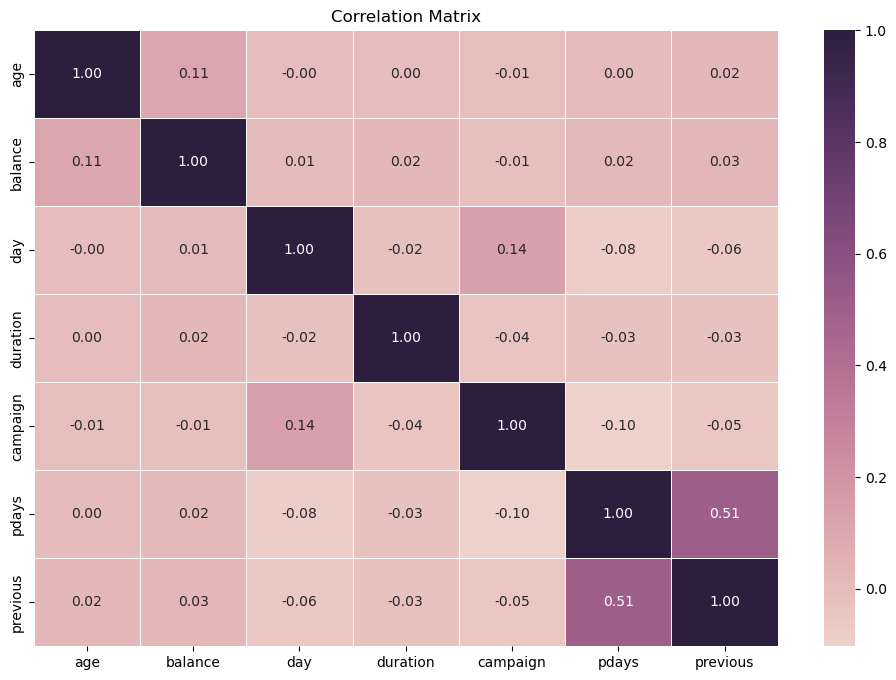

In [26]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f",linewidth=.5)
plt.title('Correlation Matrix')
plt.show()


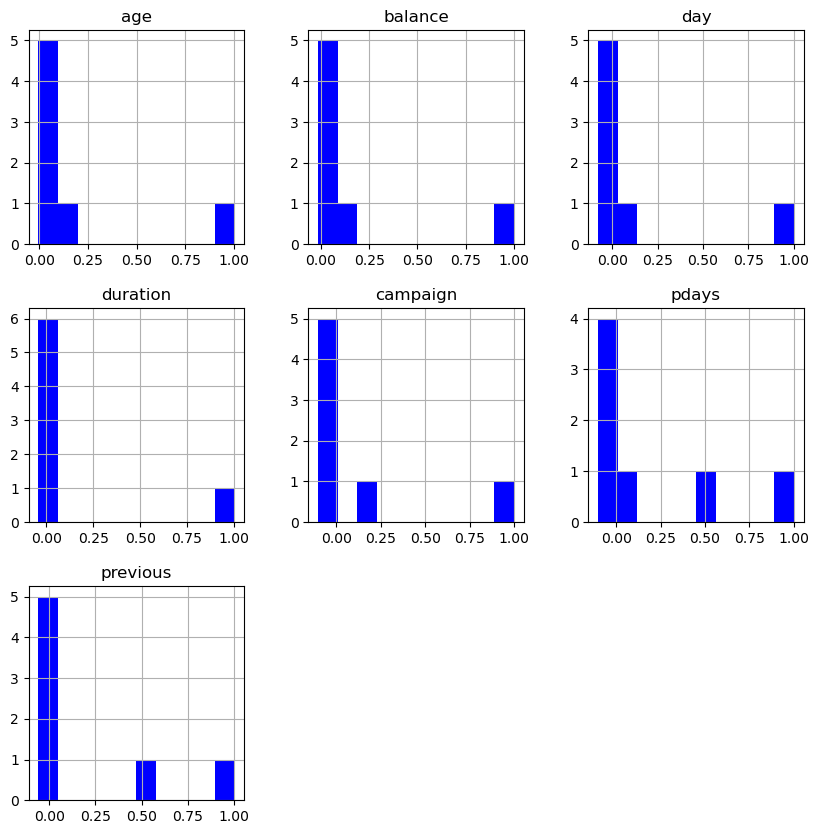

In [27]:
correlation_matrix.hist(figsize=(10, 10), color='blue', grid=True)  
plt.show()

### Label Encoding

As we see that : "job","marital","education","default","housing","loan","contact","month","poutcome" are categorical data. So we are coverting them .

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['job'] = label_encoder.fit_transform(data['job'])
data['marital'] = label_encoder.fit_transform(data['marital'])
data['education'] = label_encoder.fit_transform(data['education'])
data['default'] = label_encoder.fit_transform(data['default'])
data['housing'] = label_encoder.fit_transform(data['housing'])
data['loan'] = label_encoder.fit_transform(data['loan'])
data['contact'] = label_encoder.fit_transform(data['contact'])
data['month'] = label_encoder.fit_transform(data['month'])
data['poutcome'] = label_encoder.fit_transform(data['poutcome'])

### Train and Test Split

In [4]:
from sklearn.model_selection import train_test_split

In [10]:
X=data.drop("deposit",axis=1)
y=data["deposit"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building

#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [41]:
#creating an object of logistic regression model
lreg = LogisticRegression()
#fitting the data into the model
lreg.fit(X_train,y_train)


C:\Users\Angela\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
#Making predictions on the validation set
pred = lreg.predict(X_test)
#Calculating the accuracy score
accuracy_score(y_test,pred)


0.7487684729064039

####  Decision Tree

In [45]:
#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
#fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [47]:
#making predictions on the validation set
predict = clf.predict(X_test)
predict

array(['no', 'yes', 'yes', ..., 'no', 'yes', 'no'], dtype=object)

In [49]:
#Calculating the accuracy
accuracy_score(y_test,predict)

0.787281683833408

In [51]:
clf = DecisionTreeClassifier()
y_predict = clf.fit(X_train, y_train).predict(X_test)

In [54]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          no       0.77      0.79      0.78      1166
         yes       0.76      0.74      0.75      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



In [56]:
print(confusion_matrix(y_test, y_predict, labels=clf.classes_))


[[917 249]
 [279 788]]


Text(0.5, 1.0, 'Top 20 Features')

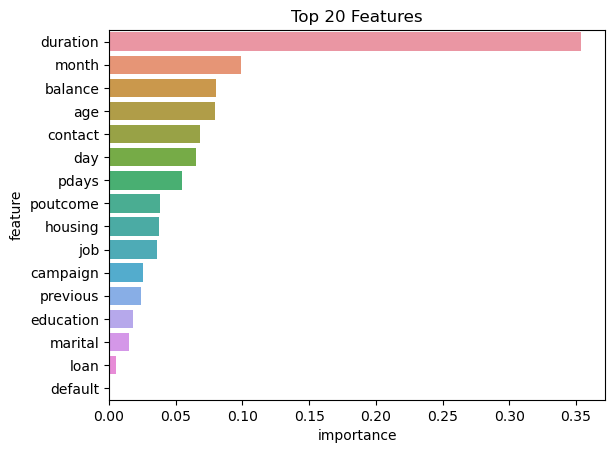

In [63]:
fi = pd.DataFrame({"feature":X_train.columns.to_list(), "importance": clf.feature_importances_}).sort_values(by="importance", ascending=False)
sns.barplot(x="importance", y="feature", data=fi.head(20))
plt.title("Top 20 Features")